<a href="https://colab.research.google.com/github/takashisuo/nlp/blob/main/NLP_100_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget -P "/content/drive/My Drive/download" https://nlp100.github.io/data/neko.txt

--2021-01-11 03:56:06--  https://nlp100.github.io/data/neko.txt
Resolving nlp100.github.io (nlp100.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 975789 (953K) [text/plain]
Saving to: ‘/content/drive/My Drive/download/neko.txt.4’

neko.txt.4          100%[===================>] 952.92K  --.-KB/s    in 0.1s    

2021-01-11 03:56:07 (8.14 MB/s) - ‘/content/drive/My Drive/download/neko.txt.4’ saved [975789/975789]



In [ ]:
!apt install mecab libmecab-dev mecab-ipadic-utf8

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libmecab2 mecab-ipadic mecab-jumandic mecab-jumandic-utf8 mecab-utils
The following NEW packages will be installed:
  libmecab-dev libmecab2 mecab mecab-ipadic mecab-ipadic-utf8 mecab-jumandic
  mecab-jumandic-utf8 mecab-utils
0 upgraded, 8 newly installed, 0 to remove and 16 not upgraded.
Need to get 29.0 MB of archives.
After this operation, 277 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab2 amd64 0.996-5 [257 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab-dev amd64 0.996-5 [308 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 mecab-utils amd64 0.996-5 [4,856 B]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 mecab-jumandic-utf8 all 7.0-20130310-4 [16.2 MB]
Get:5 http://archive.ubuntu.com/ubuntu bionic/universe amd6

In [ ]:
pwd

'/content'

In [ ]:
!ls

drive  sample_data


In [ ]:
!mecab -o "/content/drive/My Drive/download/neko.txt.mecab" "/content/drive/My Drive/download/neko.txt"

In [ ]:
m_path = "/content/drive/My Drive/download/neko.txt.mecab"

In [ ]:
!wc -l "/content/drive/My Drive/download/neko.txt.mecab"

226266 /content/drive/My Drive/download/neko.txt.mecab


In [ ]:
!head -15 "/content/drive/My Drive/download/neko.txt.mecab"

一	名詞,数,*,*,*,*,一,イチ,イチ
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ


0:表層形(surface)<br>
1:品詞(pos)<br>
2:品詞細分類1(pos1)<br>
7:基本形(base)<br>

30. 形態素解析結果の読み込み<br>形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [ ]:
m_path = "/content/drive/My Drive/download/neko.txt.mecab"

sentences = []
morphs = []
count = 0
with open(m_path, mode='r') as f:
  for line in f:  # 1行ずつ読込
    if line == 'EOS\n':
      sentences.append(morphs)
      morphs = []
      continue

    fields = line.split('\t')
    if len(fields) != 2 or fields[0] == '':  # 文頭以外の空白と改行文字はスキップ
      continue

    count = count + 1    
    attr =  fields[1].split(',')
    morph = {'surface': fields[0], 'base': attr[6], 'pos': attr[0], 'pos1': attr[1]}
    morphs.append(morph)

for morph in sentences[2]:
  print(morph)

{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}
{'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}
{'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}
{'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}


31. 動詞<br>
動詞の表層形をすべて抽出せよ．

In [ ]:
ans = set()
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] != '動詞':
      continue
    
    ans.add(morph['surface'])

print(f'動詞の表層形の種類: {len(ans)}\n')
print('---サンプル---')
for v in list(ans)[:10]:
  print(v)



動詞の表層形の種類: 3893

---サンプル---
聴き
侵し
覗く
いざっ
しる
変ずる
振り落とそ
活け
対し
通さ


32. 動詞の原形<br>
動詞の原形をすべて抽出せよ．

In [ ]:
ans = set()
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] != '動詞':
      continue
    
    ans.add(morph['base'])

print(f'動詞の表層形の種類: {len(ans)}\n')
print('---サンプル---')
for v in list(ans)[:10]:
  print(v)

動詞の表層形の種類: 2300

---サンプル---
冷める
覗く
堪る
しる
変ずる
連れ出す
証拠立てる
貫く
撓る
与える


33. 「AのB」<br>
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [ ]:
ans = set()
for sentence in sentences:
  for i in range(1, len(sentence) - 1):
    if sentence[i-1]['pos']  == '名詞' and sentence[i]['surface']  == 'の' and sentence[i+1]['pos']  == '名詞':
      ans.add(sentence[i-1]['surface'] + 'の' + sentence[i+1]['surface'])

print(f'「名詞+の+名詞」の種類: {len(ans)}\n')
print('---サンプル---')
for n in list(ans)[:10]:
  print(n)

「名詞+の+名詞」の種類: 4924

---サンプル---
ための方便
表の方
近松の世話物
二の絵
中のカステラ
こっちの手
咄嗟の間
これしきの事
恐縮の結果
何等の関係


34. 名詞の連接<br>
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．


In [ ]:
concat = ""
num = 0
result = set()
for sentence in sentences:
  for morph in sentence:
    if morph["pos"] == "名詞":
      concat = ''.join([concat, morph["surface"]])
      num += 1
    elif num >= 2:
      result.add(concat)
      num = 0
      concat = ''
    else:
      num = 0
      concat = ''
  if num >= 2:
    result.add(concat)

# 確認
print(f'連接名詞の種類: {len(result)}\n')
print('---サンプル---')
for n in list(result)[:10]:
  print(n)
    

連接名詞の種類: 4458

---サンプル---
manyaslip'twixtthecupandthelip
黒猫
迷亭さん
説服
西洋通
不意撃
かいらしった
みんな一度
一枚寒月君
形身


35. 単語の出現頻度<br>
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [ ]:
key2num = {}
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] == '記号':
      continue
      
    if morph["surface"] in key2num:
      val = key2num[morph["surface"]]
      key2num[morph["base"]] = val + 1
    else:
      key2num[morph["base"]] = 1
      
score_sorted = sorted(key2num.items(), key=lambda x:x[1], reverse=True)
print(score_sorted)

[('の', 9194), ('て', 6848), ('てる', 6722), ('は', 6420), ('に', 6243), ('を', 6071), ('と', 5508), ('が', 5337), ('も', 2479), ('だ', 2084), ('で', 2084), ('から', 2031), ('かる', 1993), ('でる', 1923), ('ん', 1568), ('か', 1529), ('事', 1207), ('へ', 1034), ('う', 987), ('もの', 981), ('君', 973), ('主人', 932), ('よう', 696), ('ね', 657), ('この', 649), ('御', 636), ('ば', 617), ('人', 602), ('その', 576), ('一', 554), ('そう', 546), ('何', 539), ('よ', 502), ('吾輩', 481), ('これ', 414), ('さ', 410), ('それ', 381), ('でも', 346), ('時', 345), ('三', 319), ('な', 317), ('まで', 313), ('ところ', 313), ('方', 312), ('二', 303), ('上', 294), ('いい', 294), ('いう', 288), ('寒月', 286), ('顔', 282), ('先生', 274), ('人間', 272), ('くらい', 269), ('僕', 268), ('さん', 260), ('気', 250), ('猫', 248), ('だけ', 246), ('また', 238), ('中', 234), ('ばかり', 231), ('十', 231), ('どう', 220), ('って', 216), ('細君', 213), ('など', 205), ('鼻', 199), ('今', 195), ('大', 195), ('者', 194), ('そんな', 194), ('や', 193), ('あの', 189), ('しかし', 185), ('ながら', 179), ('じゃ', 178), ('より', 176), ('自分', 175), ('

36. 頻度上位10語<br>
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [ ]:
!pip install japanize_matplotlib

     |████████████████████████████████| 4.1MB 11.6MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-cp36-none-any.whl size=4120276 sha256=b925be170437da0a88e4bc14a9b0c8109d72ee326dc5554cc356f19967a9af79
  Stored in directory: /root/.cache/pip/wheels/b7/d9/a2/f907d50b32a2d2008ce5d691d30fb6569c2c93eefcfde55202
Successfully built japanize-matplotlib


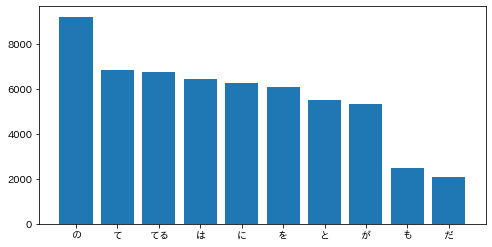

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib

key2num = {}
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] == '記号':
      continue
      
    if morph["surface"] in key2num:
      val = key2num[morph["surface"]]
      key2num[morph["base"]] = val + 1
    else:
      key2num[morph["base"]] = 1

# ここでdict->list(tuple集合体)へ変換されるので注意      
score_sorted = sorted(key2num.items(), key=lambda x:x[1], reverse=True)
keys = [a[0] for a in score_sorted[0:10]]
values = [a[1] for a in score_sorted[0:10]]

plt.figure(figsize = (8, 4))
plt.bar(keys, values)
plt.show()

37. 「猫」と共起頻度の高い上位10語<br>「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

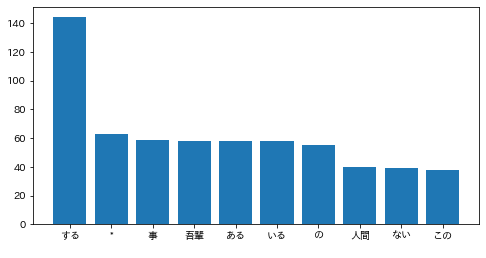

In [ ]:
from collections import defaultdict 
ans = defaultdict(int)
for sentence in sentences:
  if '猫' in [morph['surface'] for morph in sentence]:
    for morph in sentence:
      if morph['pos'] != '記号' and morph['pos'] != '助詞' and morph['pos'] != '助動詞':
        ans[morph['base']] += 1

del ans['猫']
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

keys = [a[0] for a in ans[0:10]]
values = [a[1] for a in ans[0:10]]
plt.figure(figsize=(8, 4))
plt.bar(keys, values)
plt.show()

38. ヒストグラム<br>
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

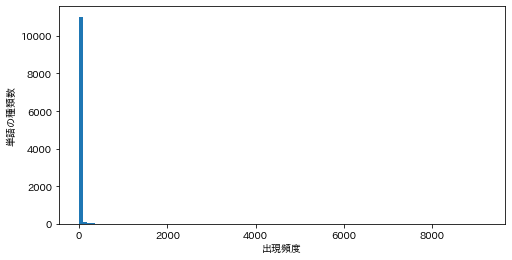

In [23]:
ans = defaultdict(int)
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] != '記号':
      ans[morph['base']] += 1

ans = ans.values()
plt.figure(figsize=(8, 4))
plt.hist(ans, bins=100)
plt.xlabel('出現頻度')
plt.ylabel('単語の種類数')
plt.show()

39. Zipfの法則<br>
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

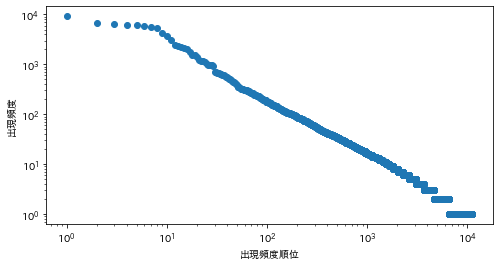

In [24]:
import math

ans = defaultdict(int)
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] != '記号':
      ans[morph['base']] += 1
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

ranks = [r + 1 for r in range(len(ans))]
values = [a[1] for a in ans]
plt.figure(figsize=(8, 4))
plt.scatter(ranks, values)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('出現頻度順位')
plt.ylabel('出現頻度')
plt.show()